# 频数、概率、分布

## 频数
* 频数：目标值出现的次数


In [ ]:
import pandas as pd
df = pd.read_excel('4 推断性统计基础.xlsx',sheet_name='Score')
score = df['Score'].sort_values()  # 对score从小到大排序
score

In [ ]:
score.value_counts()  
# 计算每个成绩出现的频数，value_counts()是Series的方法
# 统计结果默认按频数排序

In [ ]:
score.value_counts(sort=False)  
# 不按频数排序， 按score的原始值排序

In [ ]:
# 画图表示 频数分布
score.value_counts(sort=False).plot.bar()

In [ ]:
score.value_counts(sort=False, bins=5)  
# 将连续值离散化为大小相等的5个区间（bins）
# 将60-96区间5等分

In [ ]:
score.value_counts(sort=False, bins=[0, 60, 70, 80, 90, 100])  
# 将连续值离散化为自行设定的区间

In [ ]:
score.value_counts(sort=False, bins=[0, 59.99, 69.99, 79.99, 89.99, 100])  
# 调整区间间隔，避免60分被计入不及格

In [ ]:
# 画图表示 频数分布(pandas的Series内置的方法)
score_bins = score.value_counts(sort=False, 
                                bins=[0, 59.99, 69.99, 79.99, 89.99, 100]) 
score_bins.plot.bar()

In [ ]:
# 画图表示 频数分布(matplotlib的画图函数)
import matplotlib.pyplot as plt
plt.hist(score,bins=[0, 59.99, 69.99, 79.99, 89.99, 100]) 

## 概率

### 概率的定义
* 事件的*概率*：事件的发生频数÷总频数
$$事件A的概率,记为P(A)=\frac{A的发生频数}{总频数}$$

* 用X表示分数，则X为一随机变量: X有20个取值（总频数）、18种可能性

In [ ]:
score.value_counts(sort=False)  

* 记随机变量X=83为**事件A**，则A的概率可表示为：
$$ P(X=83)=P(A)=\frac{2}{20}=0.1$$

### 无条件概率(先验概率)
* 例子1：女同学40位，"是女同学"用A表示；男同学60位，"是男同学"用$\overline{A}$表示； 
    * 随机抽取一位同学
    * "是女同学"的概率可记为P(A)=0.4 
    * "是男同学"的概率可记为P($\overline{A}$)=0.6
* 例子2：红衣同学20位，"是红衣同学"用B表示；"非红衣同学"80位，"非红衣同学"用$\overline{B}$表示； 
    * 随机抽取一位同学
    * "是红衣同学"的概率可记为P(B)=0.2  
    * "非红衣同学"的概率可记为P($\overline{B}$)=0.8

### 条件概率(后验概率)
* 随机抽取一位同学，若发现其穿红衣(B发生)，该同学为女同学的概率记为P(A|B)
$$P(A|B)=\frac{P(AB)}{P(B)}=\frac{P(A)*P(B|A)}{P(B)}=\frac{P(A)}{P(B)}*P(B|A)$$
* 通常, 条件概率P(A|B)≠先验概率P(A)
    * 假设20位红衣同学中, 女同学15位, 男同学5位, 则条件概率$P(A|B)=\frac{15}{20}=\frac{15/100}{20/100}=0.75$, ≠ 先验概率$P(A)=0.4$ 
    * 这意味着, 发现一位同学穿红衣, 则其为女同学的概率上升(0.4→0.75), 其为男同学的概率下降
* 但是, 也有可能,条件概率P(A|B)=先验概率P(A)
    * 假设20位红衣同学中, 女同学8位, 男同学12位, 则条件概率P(A|B)=8/20=0.4, =先验概率P(A)=0.4 
    * 这意味着, 发现一位同学穿红衣, 则其为女同学的概率不变, 穿衣特征对男女同学的预测没有影响
    * 此时,称事件A与B为相互独立(B不影响A的发生概率)：
    $$由P(A)=P(A|B)=\frac{P(AB)}{P(B)}, 可得：P(AB)=P(A)P(B)$$
    

### 全概率公式
* 如果事件组$\left\{B_{1}, B_{2}, \cdots, B_{n}\right\}(n \geqslant 2)$互不相容, 但必有一件事发生, 且每件事的发生概率均为正数, 则对任何事件A(无论A与$\left\{B_{1}, B_{2}, \cdots, B_{n}\right\}$是否有任何关系), 都有$$P(A)=\sum_{i=1}^{n} P\left(B_{i}\right) P\left(A \mid B_{i}\right)$$
* 全概率公式把世界分成了n个可能的情形$\left\{B_{1}, B_{2}, \cdots, B_{n}\right\}$,再把每种情况下的条件概率$P\left(A \mid B_{i}\right)$“加权平均”而汇总成无条件概率 (权重$P(B)$是每种情形的发生概率)
* 例子
    * 事件组$\left\{{B}, \overline B \right\}$互不相容
    * 20位红衣同学中, 女同学15位, 男同学5位, 则"红衣同学"的概率$P(B)=0.2$, 红衣同学中"是女同学"的概率$P(A|B)=\frac{15}{20}$
    * 80位非红衣同学中, 女同学25位, 男同学55位, 则"非红衣同学"的概率$P(\overline B)=0.8$, 非红衣同学中"是女同学"的概率$P(A|\overline B)=\frac{25}{80}$
    * 是女同学的概率$P(A)= P(B) P(A|B)+P(\overline B) P(A|\overline B)=0.2*\frac{15}{20}+0.8*\frac{25}{80}=0.4$


## 分布（概率分布）
* 分布（概率分布），指事件**全部取值**的发生概率
* **事件**一般用随机变量（如X，score）表示, 因而, 概率分布就是随机变量**全部取值**的发生概率
* 频数分布÷总频数, 可得概率分布
* 例如，用score表示分数，则score为一个随机变量，score的概率分布为：

In [ ]:
score.value_counts(sort=False) / 20  
# 频数分布÷总频数20
# 随机变量X的概率分布（将频数分布转换为概率分布）

In [ ]:
score.value_counts(normalize = True,sort=False)    
# normalize = True, 不输出频数，而输出概率（标准化）
# 随机变量X的概率分布（将频数分布转换为概率分布）

In [ ]:
# 画图表示 概率分布
score.value_counts(normalize=True,sort=False).plot.bar()

* 已知概率分布，可计算各种情况的概率
* 例如：随机抽取一个体：
    * 分数为60的概率为0.05
    * 分数为83的概率为0.10
    * 分数为62的概率为0
    * 分数≥90的概率为0.30

In [ ]:
# 将随机变量X划分为5个区间，产生新随机变量Y
# 随机变量Y的概率分布（将频数分布转换为概率分布）
score.value_counts(normalize=True,
                   sort=False, 
                   bins=[0, 59.99, 69.99, 79.99, 89.99, 100])  
# normalize = True, 不输出频数，而输出概率（标准化）

In [ ]:
# 画图表示 概率分布
score_bins = score.value_counts(normalize = True,
                                sort=False, 
                                bins=[0, 59.99, 69.99, 79.99, 89.99, 100]) 
score_bins.plot.bar()

# 常见的概率分布

## 离散型概率分布
* 定义
    * 若随机变量X的取值为有限个, 或者无限但可数
    * 符号表示: X的可能取值为$({x_1},{x_2},...,{x_k},...)$, 其对应的概率为$({p_1},{p_2},...,{p_k},...)$
    * 则称X为离散型随机变量, X服从离散型概率分布（离散分布）
* 例子：
    * 学生的成绩（取值为：0、1、2、……、100, 百分制，假设不能取小数）
    * 性别（取值为：男、女）
    * 投骰子的点数（取值为：1、2、3、4、5、6）
    * 每天的新冠病毒阳性病例数（取值为：0、1、2、3……）
    * 宇宙中的基本粒子(无限但可数)
* 常见的离散分布类型
    * 两点分布（0-1分布）
    * 二项分布
    * 泊松分布

## 连续型概率分布
* 定义
    * 若随机变量X可以取任意实数 (可以取区间内任意实数值) 
    * 则称X为连续型随机变量, X服从连续型概率分布（连续分布）
* 例子：
    * 学生的身高（假设可取小数，有无穷多的可能取值）
    * 小区解封的时间（0-24时内的任意时间点）
    * 股票价格（股票价格精确到分时，可能的取值非常多，可视为连续分布）
* 常见的连续分布类型
    * 均匀分布
    * 正态分布
    * t分布
    * $x^2$分布
    * F分布

## 在python中的缩写
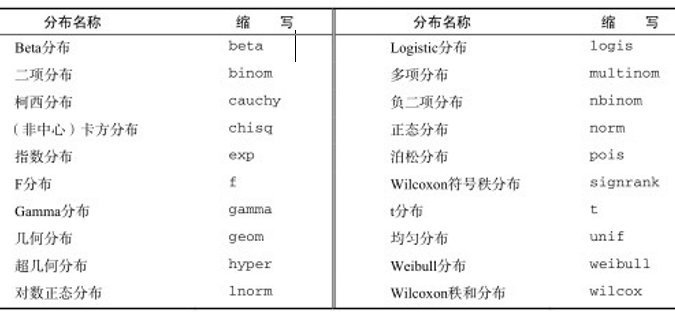

# 二项分布
## 二项分布的定义
* 假设在一次试验中，事件出现的概率为 $p$，事件不出现的概率为 $q=1-p$
* 若仅进行**1次试验**，变量X表示事件出现的次数，则X取值为0或1，称随机变量X服从**两点分布（0-1分布、伯努利分布）**
    * 事件不出现的概率, 也即X=0的概率: $P(X=0)=q=1-p$
    * 事件出现的概率, 也即X=1的概率: $P(X=1)=p$
* 若进行**n次独立试验**（n次伯努利试验），变量X表示事件出现的次数，则X取值为0、1、2、...、n中的某个数，称随机变量X服从**二项分布**,记为$X\sim B(n,p)$
    * X=0的概率: $P(X=0)=(1-p)^n$
    * X=k的概率: $P(X=k)=C_{n}^{k} p^{k}(1-p)^{n-k}=\frac{n !}{k !(n-k) !}p^{k}(1-p)^{n-k}$
    * X的均值(期望值)$E(X)=n*p$
    * X的方差$D(X)=n*p*q$

In [ ]:
# 掷硬币试验，1个硬币10次，每次正面向上、反面向上的概率相等
# 0次正面向上的概率是多少？
n = 10
p = 0.5
q = 1-p
k = 0
(1-p)**n    # 0次正面向上的概率

In [ ]:
# 5次正面向上的概率是多少？
k = 5
from math import factorial  #从内置math包中引入阶乘计算函数
factorial(n)/(factorial(k)*factorial(n-k)) * (p**k) * (1-p)**(n-k)    
# 5次正面向上的概率

## 概率质量函数
* 概率质量函数, probability mass function, pmf
    * 返回离散随机变量X取特定值k的概率 P(X=k)
    * 注意, 连续随机变量X取每一特定点的概率为0, 因而没有概率质量函数

In [ ]:
# 返回离散随机变量k取0,1,2...10时的概率
n = 10
p = 0.5
from math import factorial
for k in range(11):
    probability = factorial(n)/(factorial(k)*factorial(n-k)) * (p**k) * (1-p)**(n-k) 
    print('%i次正面朝上的概率为%.4f'%(k,probability))    

In [ ]:
from scipy import stats  # 引入scipy中的stats 
stats.binom.pmf(k=5,n=10,p=0.5) 
# 返回5次正面向上的概率

In [ ]:
stats.binom.pmf(k=0,n=10,p=0.5) # 0次正面向上的概率

In [ ]:
# 离散随机变量X在所有特定值的概率
import numpy as np
import matplotlib.pylab as plt
n = 10
p = 0.5
q = 1-p
X = np.arange(0, n+1) # X代表所有可能取值0、1、2、...、10
pList = stats.binom.pmf(X, n, p) #计算X对应的发生概率
plt.plot(X, pList, marker='o',linestyle='None')
plt.vlines(X, 0, pList) #vlines用于绘制竖直线
plt.xlabel('X')  #x轴标签
plt.ylabel('probability')  # y轴标签
plt.title('Binomial Distribution:n=%i, p=%.2f' % (n,p))  #标题
plt.show()  #显示图形

## 累积分布函数
* 累积分布函数, cumulative distribution function, cdf
    * 返回随机变量X的累积概率, 也即随机变量$X≤k$值的概率$P(X≤k)$
    * $p=cdf(k)$, 已知随机变量X的特定取值k, 返回随机变量X的**左尾**累积概率p

In [ ]:
stats.binom.cdf(k=5,n=10,p=0.5)
#  返回累积概率, 也即随机变量X<= 5 的概率

In [ ]:
stats.binom.cdf(k=5,n=10,p=0.5) - stats.binom.cdf(k=4,n=10,p=0.5)
# 随机变量X= 5 的概率

## 分位数函数
* 分位数函数, percent point function, ppf
    * 返回随机变量X"与累积概率对应"的特定取值, 是累积分布函数的逆函数 
    * $k=ppf(p)$, 已知随机变量X截止至**未知点**的左尾累积概率为p, 返回未知点的具体取值(记为k)

In [ ]:
# 寻找随机变量X的某个取值, 使得X<=该值（分位数）的概率为0.95
stats.binom.ppf(0.95,n=10,p=0.5)  
# ppf函数返回值叫分位数, 也即, 随机变量X小于该分位数的概率(左尾累积概率)为0.95

## n足够大时的二项分布

In [ ]:
p = 0.5
n = 30   # 实验次数从10次增长到30次
X = np.arange(0, n+1) # X代表所有可能取值0、1、2、...、30
pList = stats.binom.pmf(X, n, p) #计算X对应的发生概率
plt.plot(X, pList, marker='o',linestyle='None')
plt.vlines(X, 0, pList) #vlines用于绘制竖直线
plt.xlabel('X')  #x轴标签
plt.ylabel('probability')  # y轴标签
plt.title('Binomial Distribution:n=%i, p=%.2f' % (n,p))  #标题
plt.show()  #显示图形

* 当n非常大时,例如n=1000时, 随机变量X的每个取值的概率接近0, 例如,事件刚好发生500次的概率P(X=500)约0.025, 随机变量X趋向于连续分布
* 当n足够大(确保n×p和n×(1-p)都≥10)时, 随机变量X(事件发生次数)近似服均值为n×p、方差为n×p×(1-p)的从正态分布


In [ ]:
# 一项考试有48道单项选择题, 每题4个选项
# 仅凭猜测刚好答对15题的概率:
stats.binom.pmf(k=15,n=48,p=0.25) 

In [ ]:
# 仅凭猜测答对小于等于15题的概率:
stats.binom.cdf(k=15,n=48,p=0.25) 

In [ ]:
# 仅凭猜测答对大于15题的概率:
1 - stats.binom.cdf(k=15,n=48,p=0.25) 

In [ ]:
# 仅凭猜测答对小于等于15题的概率(用正态分布来近似):
stats.norm.cdf(15, loc=48*0.25, scale=(48*0.25*0.75)**0.5 )
# 因np和n(1-p)都≥10时, X的近似服从正态分布, 详见后文

## 二项分布的应用: 总体比例的假设检验
* 例子 
    * 从该地大学生群体中随机抽取1000人，发现63人感染新冠病毒
    * 该地大学生感染率**显著低于**0.08(该地整体感染率)吗？
* 问题
    * 总体: 该地大学生的感染情况
    * 样本: 随机抽取1000位大学生的感染情况
    * 用样本推断总体: 该地大学生感染率**显著低于**0.08吗？ 
* 解答
    * 原假设：该地大学生感染率**等于**0.08 (一位同学感染的概率为0.08) 
    * 备择假设: 该地大学生感染率**低于**0.08
    * 若原假设正确, 随机抽取1000人, 感染人数X服从**二项分布**$X\sim B(1000,0.08)$    

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from scipy import stats 
# 随机变量X取值范围为(0,1000) 两端概率近于0,只取中间(40,130)
X = np.arange(40,131) 
plt.plot(X,stats.binom.pmf(X,n=1000,p=0.08))  
# 用概率质量函数,画X每个取值的发生概率
# 注意,X为二项分布(离散分布),但点过多、视觉上连成了线

* 结论
    * 感染人数X<=63的概率为0.024, 这是小概率事件、极端事件(小于5%的发生概率)
    * 小概率事件发生, 推断原假设错误, 接受备择假设: 该地大学生感染率低于0.08

In [1]:
from scipy import stats  # 引入scipy中的stats
stats.binom.cdf(63,n=1000,p=0.08)
# 感染人数X<=63的概率为0.024，这是小概率事件

0.02427087233325258

In [2]:
# 二项分布假设检验，含义同上
stats.binomtest(63,n=1000,p=0.08,alternative='less')
# 备择假设为≤, 因而指定alternative='less'

BinomTestResult(k=63, n=1000, alternative='less', proportion_estimate=0.063, pvalue=0.02427087233325258)

* 问题
    * 从该地流动人口中随机抽取1000人，发现91人感染
    * 该地流动人口感染率, 显著高于0.08(该地整体感染率)吗？

In [ ]:
1 - stats.binom.cdf(90,n=1000,p=0.08)  # 计算右尾概率

* 感染人数X>=91的概率, 不是小概率事件
* 无法得出流动人口感染率显著高的结论

# 正态分布
## 正态分布的定义
* 若随机变量X的概率密度函数$f(x)$为:
$$f(x)=\frac{1}{\sqrt{2 \pi \sigma^{2}}} e^ {\frac{-(x-\mu)^2}{2 \sigma^2}}$$
* 则称随机变量X服从正态分布, 记为 $X \sim N\left(\mu, \sigma^2\right)$
* 可将随机变量X标准化为新随机变量$\frac{X-\mu}{\sigma}$, 该随机变量(z分数)服从标准正态分布, 记为$z=\frac{X-\mu}{\sigma} \sim N(0, 1)$

In [ ]:
from numpy import exp, pi, sqrt
import matplotlib.pyplot as plt

# 返回随机变量X对应的概率密度,等价于stats.norm.pdf( )函数
def f(x, mu=0, sigma=1):
    return 1/sqrt(2*pi*sigma**2) * exp(-(x-mu)**2/(2*sigma**2))

# 随机变量X的可能取值、对应的概率密度
X = np.arange(-4, 4, 0.1)
y_1 = f(X, 0, 1.0)
y_2 = f(X, -2, 1.0)
y_3 = f(X, 0, 0.6)
y_4 = f(X, 0, 3.0)

# 绘图
plt.plot(X, y_1, color='green')
plt.plot(X, y_2, color='blue')
plt.plot(X, y_3, color='black')
plt.plot(X, y_4, color='red')
plt.show()

## 概率密度函数
* 缘由
    * 连续随机变量X取每一特定点的概率为0, 如p(X=0.5)=0
    * 因而, 连续分布没有概率质量(函数), 需要定义概率密度 
* 概率密度函数, probability density function, pdf
    * 物理学的定义：$密度=\frac {质量}{体积}$， 因而：$质量=密度*体积$
    * 统计学借鉴了密度的物理学定义：$密度=\frac {概率}{区间}$， 因而：$概率=密度*区间$
    * 连续随机变量X取值在某区域的概率, 是概率密度函数在该区域的积分(面积)

In [ ]:
plt.ylim(0, 0.45)
plt.plot(X, f(X,0,1))

* 标准正态分布$X \sim N(0, 1)$的概率密度

In [ ]:
from scipy import stats  # 引入scipy中的stats 
# 返回概率密度: 服从标准正态分布的随机变量X, 在 X=0处的概率密度
stats.norm.pdf(0, loc=0, scale=1)   
# 参数loc= 指定均值，参数scale= 指定标准差
# 注意, 概率密度并非发生概率, 连续分布的随机变量X取值为某点的概率P(X=0)为0

In [ ]:
stats.norm.pdf(1.2, loc=0, scale=1)  
# 随机变量X在 X=1.2处的概率密度

## 累积分布函数
* 累积分布函数, cumulative distribution function, cdf
    * 返回随机变量X的累积概率, 也即随机变量$X≤k$值的概率$P(X≤k)$
    * $p=cdf(k)$, 已知随机变量的特定取值k, 返回随机变量的累积概率p

In [ ]:
# 返回累积概率: 服从标准正态分布的随机变量X, X<= 1.2 时的概率, P(X<=1.2)
stats.norm.cdf(1.2, loc=0, scale=1)    
# 数值上, 是随机变量X的概率密度函数在(-∞, 1.2)区间的积分

In [ ]:
plt.ylim(0, 0.45)      # 限定y轴
plt.plot(X, f(X,0,1))   # 画标准正态分布的概率密度线
x_lim = np.arange(-4,1.2,0.1)
plt.vlines(x_lim , ymin=0, ymax=f(x_lim,0,1),color='green')  # 绘制竖直线
plt.text(x=-0.5,y=0.2,s='p=?', fontsize=20,color='red')
plt.text(x=1.2,y=0,s='1.2',color='black')

In [ ]:
# 服从标准正态分布的随机变量X, 在(1.2, +∞)区间的概率
1 - stats.norm.cdf(1.2)    # loc=0, scale=1 为默认值 , 可省略

In [ ]:
# 服从标准正态分布的随机变量X, 在(-0.5, 1.2)区间的概率
stats.norm.cdf(1.2) - stats.norm.cdf(-0.5) 

## 分位数函数
* 分位数函数, percent point function, ppf
    * 返回随机变量X"与累积概率对应"的特定取值, 是累积分布函数的逆函数  
    * $k=ppf(p)$, 已知随机变量X截止至**未知点**的左尾累积概率为p, 返回未知点的具体取值(记为k)

In [ ]:
# 返回分位数: 寻找随机变量X的某个取值, 使得X<=该值（分位数）的概率为0.95
stats.norm.ppf(0.95, loc=0, scale=1)          
# ppf函数返回值叫分位数, 也即, 随机变量X小于该分位数的概率为0.95

In [ ]:
plt.ylim(0, 0.45)      # 限定y轴
plt.plot(X, f(X,0,1))   # 画标准正态分布的概率密度线
X_lim = np.arange(-4,1.64485,0.1)
plt.vlines(X_lim , ymin=0, ymax=f(X_lim,0,1),color='green')  # 绘制竖直线
plt.text(x=-1,y=0.2,s='p=0.95', fontsize=20,color='black')
plt.text(x=1.64485,y=0,s='?', fontsize=20,color='red')

## 正态分布计算例子
* 假设: 人们第一次结婚的年龄近似服从正态分布, 第一次结婚的平均年龄是26岁, 标准差是4年

In [ ]:
# 某人第一次结婚时的年龄小于23岁的概率
stats.norm.cdf(23, loc=26, scale=4) 

In [ ]:
# 某人第一次结婚时的年龄在20-30岁之间的概率
stats.norm.cdf(30, 26, 4) - stats.norm.cdf(20, 26, 4) 

In [ ]:
# 95%的人在什么年龄前第一次结婚
stats.norm.ppf(0.95, loc=26, scale=4)   # 左尾概率为0.95

In [ ]:
# 95%的人在什么年龄后第一次结婚
# 等价于: 5%的人在什么年龄前第一次结婚
stats.norm.ppf(0.05, loc=26, scale=4)  # 左尾概率为0.05

# 样本均值的分布

## 从总体中产生**一个**样本
* 总体容量为5, 含5个个体: 3, 4, 6, 8, 9
* 从总体中随机产生一个样本(放回有序抽样), 样本容量为3, 含3个个体, 例如:3, 3, 4
* 提问
    * 请计算总体的均值、方差, 样本的均值、方差(参见excel文件)
    * 容量为3的一个样本的均值、方差, 可以预测总体的均值、方差吗?

## 从总体中产生**所有可能**的样本
* 在总体{3, 4, 6, 8, 9}中随机产生一个样本, 样本容量为3、放回有序抽样, 该样本刚好为{3, 3, 4}的概率有多大?
* 在总体{3, 4, 6, 8, 9}中随机产生一个样本, 样本容量为3、放回有序抽样, 所有可能的样本有多少种?
    * 可能的样本有$5*5*5=125$种
    * 放回有序样本{3, 3, 4}的概率是$0.2*0.2*0.2=1/125$
* 对样本数据计算方差(样本方差), 为什么需将分母修正为3-1? 
    * 在计算样本方差时, 需要用到均值, 但总体均值往往未知, 需用该样本的均值来替代
    * 此时, 若计算方差时分母为3, 共125组样本计算出125个方差, 125个方差的均值为3.47, 小于总体方差5.20(有偏)
    * 若计算方差时将分母修正为3-1, 共125组样本计算出125个方差, 其均值为5.20, 刚好等于总体方差(无偏)
    * 也即, 分母修正为n-1后, 所得结果是对总体方差的**无偏估计**
* 样本方差的定义
    * 对于来自某总体的容量为n的一个样本, 定义$n-1$为**样本自由度**$df$, 定义$\frac{离差平方和SS}{df}=\frac{SS}{n-1}$为**样本方差**$s^2$, 定义$\sqrt{\frac{SS}{n-1}}$为**样本标准差**$s$
    * 注意: 具体某个样本, 其方差通常是偏离总体方差的(参见excel文件)

## 样本均值的抽样分布
* 抽样分布
    * 抽样所得的**样本统计量**的概率分布, 叫做它的“抽样分布”
    * 例子：样本均值的抽样分布、样本标准差的抽样分布、样本比例的抽样分布、样本中位数的抽样分布……
* 样本均值的抽样分布
    * 样本容量固定时, 样本均值所有可能取值的概率分布
    * 例如, 在总体{3, 4, 6, 8, 9}中随机产生**样本容量固定为3**的样本, 共有125组可能的样本, 可得125个样本均值(通常记为随机变量M)
    * 这些样本均值的概率分布, 叫做**样本均值的抽样分布**, 简称为样本均值分布、均值的抽样分布、均值分布
* 注意
    * 抽样分布, 并非某个样本自身数据的分布, 而是样本统计量所有可能取值的概率分布
    * 不同样本容量对应不同的抽样分布. 例如, 样本容量为3的抽样分布, 完全不同于样本容量为4的抽样分布
    * 不同抽样方法(放回抽样、不放回抽样)产生的抽样分布稍有差异; 总体非常大时, 往往忽略抽样方法带来的差异

In [2]:
import pandas as pd
df = pd.read_excel('4 推断性统计基础.xlsx',sheet_name='mean_sample')
mean_sample = df['mean_sample'].round(4).sort_values()  # 从小到大排序,.round(4)保留4位小数
mean_sample

0      3.0000
1      3.3333
25     3.3333
5      3.3333
26     3.6667
        ...  
94     8.3333
99     8.6667
119    8.6667
123    8.6667
124    9.0000
Name: mean_sample, Length: 125, dtype: float64

In [3]:
mean_sample.value_counts(sort=False) 
# 每个取值的发生频数

3.0000     1
3.3333     3
3.6667     3
4.0000     4
4.3333     6
4.6667     6
5.0000    12
5.3333    12
5.6667     9
6.0000    13
6.3333     9
6.6667    12
7.0000    12
7.3333     6
7.6667     6
8.0000     4
8.3333     3
8.6667     3
9.0000     1
Name: mean_sample, dtype: int64

<AxesSubplot:>

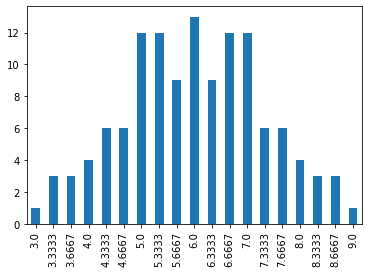

In [4]:
mean_sample.value_counts(sort=False).plot.bar()
# 每个取值的发生频数

In [5]:
mean_sample.value_counts(sort=False,normalize = True) 
# 每个取值的发生概率

3.0000    0.008
3.3333    0.024
3.6667    0.024
4.0000    0.032
4.3333    0.048
4.6667    0.048
5.0000    0.096
5.3333    0.096
5.6667    0.072
6.0000    0.104
6.3333    0.072
6.6667    0.096
7.0000    0.096
7.3333    0.048
7.6667    0.048
8.0000    0.032
8.3333    0.024
8.6667    0.024
9.0000    0.008
Name: mean_sample, dtype: float64

<AxesSubplot:>

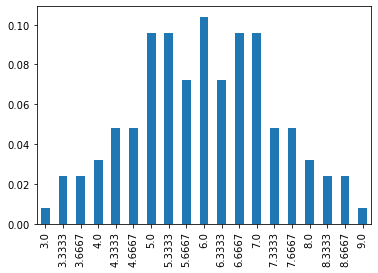

In [6]:
mean_sample.value_counts(sort=False,normalize = True).plot.bar()
# 每个取值的发生概率

## 样本均值分布的均值、标准差 
* 样本均值分布的均值
    * 样本均值分布的均值，**刚好**等于总体的均值
    * 例如, 125个样本均值的均值(表示为随机变量M的均值$\bar{M}$=6.00)，等于总体的均值(μ=6.00)
    * 但是, 单个样本的均值, 可能远远偏离样本均值的均值$\bar{M}$和总体均值μ
    * 因而, 用单个样本均值推断总体均值时, 需要考虑样本均值分布的标准差(标准差越大, 平均的偏离就越大)
* 样本均值分布的方差、标准差
    * 样本均值分布的标准差
        * 称为**样本均值的标准误**Standard Error for the Sample Mean
        * 简称为**均值的标准误、标准误** Std.Error for Mean, std.err, SEM, SE, $σ_M$
        * 反映样本统计量(样本均值)与总体参数(总体均值、样本均值的均值)的平均偏离(平均误差)
        * 若样本均值所有可能取值、发生概率已知, 可根据标准差的定义计算标准误
        * 若总体标准差σ已知, 可直接计算标准误$σ_M=\frac{σ}{\sqrt n}$, n为样本容量
    * 若总体标准差σ未知、只知某个样本的标准差s, 可对标准误进行估计,可得均值分布的**估计标准误**$s_M=\frac{s}{\sqrt n}$
        * 某一个估计标准误可能远远偏离真实的标准误
        * 估计标准误的均值未必等于真实的标准误(有偏)
        * 总体标准差σ大都未知, 通常计算的是估计标准误, 有些软件和书籍会直接将**估计标准误**写为**标准误**(SEM)

In [7]:
mean_sample.mean() # 样本均值分布的均值

6.0

In [8]:
mean_sample.std(ddof=0)  # 样本均值分布的标准差（标准误）

1.3165644182340646

In [9]:
from numpy import sqrt
sqrt(5.20)/sqrt(3)  # 样本均值分布的标准差（标准误），已知总体标准差为sqrt(5.20)

1.3165611772087669

In [10]:
sqrt(0.33)/sqrt(3)  # 估计标准误，总体标准差未知、某样本标准差为sqrt(0.33)

0.33166247903553997

In [11]:
# 某总体的均值μ=80，标准差σ=20，随机产生容量n=16的样本
# 则样本均值分布的均值为80
# 则样本均值分布的标准差（标准误）为：
20 / sqrt(16)

5.0

In [12]:
# 某总体标准差σ未知，某样本标准差s=22
# 则均值的估计标准误为：
22 / sqrt(16)

5.5

## 中心极限定理
* 推断统计的基本问题
    * 对于均值为μ、标准差为$σ$的任意总体，可知: 容量为n的样本均值分布的均值为μ、标准差为$\frac{σ}{\sqrt n}$
    * 若从总体得到某一容量为n的随机样本, 该样本的均值与总体均值的*平均偏离*是标准误$σ_M=\frac{σ}{\sqrt n}$
    * 但是, 具体偏离的发生概率是未知的
* 中心极限定理
    * 当样本来自**正态总体**时, 样本均值M(随机变量)服从正态分布，记为$M\sim N(μ,σ^2 /n)$, 或转化为$z=\frac{M-μ}{\sqrt{σ^2 /n}}\sim N(0,1)$
    * 当样本来自非正态总体、但**样本容量≥30**时, 上述结论近似成立
* 例子
    * SAT考试的分数呈正态分布，已知均值μ=500，标准差σ=100；
    * 若随机挑选出n=25个学生组成一个样本
    * 样本来自正态总体，所以样本均值M(这是一个随机变量、取值不定), 服从均值为500、标准差为$\frac{100}{\sqrt{25}}$的正态分布

In [13]:
# 样本均值M（25个学生的平均成绩）大于等于540的概率P(M≥540)：
from scipy import stats  # 引入scipy中的stats 
1 - stats.norm.cdf(540, loc=500, scale=20)  

0.02275013194817921

(0.0, 0.021)

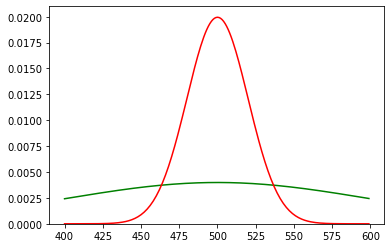

In [14]:
import matplotlib.pyplot as plt
x = np.arange(400, 600)
plt.plot(x,stats.norm.pdf(x,500,100), color='green')  # 总体分布(一位同学分数)的概率密度
plt.plot(x,stats.norm.pdf(x,500,20), color='red')  # 容量为25的样本均值分布的概率密度
plt.ylim(0,0.021)

* 样本均值(样本容量为25)与总体均值(μ=500)的平均距离为20（样本标准误）

In [15]:
# 样本均值偏离总体均值20分以内的概率P(480≤M≤520):
stats.norm.cdf(520, loc=500, scale=20) - stats.norm.cdf(480, loc=500, scale=20) 
# 正态分布1个标准差内的发生概率

0.6826894921370859

In [16]:
# 正态分布2个标准差内的发生概率
stats.norm.cdf(500+2*20, loc=500, scale=20) - stats.norm.cdf(500-2*20, loc=500, scale=20) 

0.9544997361036416

In [17]:
# 正态分布3个标准差内的发生概率
stats.norm.cdf(500+3*20, loc=500, scale=20) - stats.norm.cdf(500-3*20, loc=500, scale=20) 

0.9973002039367398

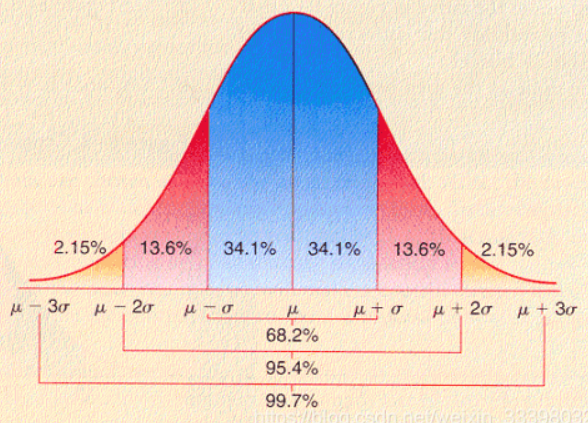

* 样本均值M服从(或近似服从)正态分布、但总体标准差σ未知, 则样本均值分布的标准差未知、无法计算z分数
    * 可基于某个样本标准差s, 构造统计量 $t分数=\frac{M-μ}{\sqrt{s^2 /n}}$ 
    * 统计量t分数服从自由度n-1的t分布, 记为 $t分数=\frac{M-μ}{\sqrt{s^2 /n}}\sim t(n-1)$
    * t分布类似标准正态分布, 参见后面章节
* 样本来自非正态总体、且样本容量＜30时, 样本均值M的分布未知
    * 可使用非参数检验
    * 非参数检验的检验效果, 通常弱于参数检验